# Agregación de datos por categoría

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [4]:
n = 500
gender_data = []
income_data = []

for i in range(n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [5]:
gender_data[:10]

['Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female']

In [6]:
income_data[:10]

['Poor',
 'Rich',
 'Middle Class',
 'Rich',
 'Middle Class',
 'Rich',
 'Rich',
 'Poor',
 'Poor',
 'Middle Class']

In [7]:
#Z -> N(0,1)
#N(m,s) = m + s*Z -> la media más la desviación estándar por la distribución normal

height = 160 + 30*np.random.randn(n)
weight = 65 + 25*np.random.randn(n)
age = 30 + 12*np.random.randn(n)
income = 18000 + 3500*np.random.randn(n)

In [8]:
data = pd.DataFrame(
    {
        "Gender": gender_data,
        "Economic Status": income_data,
        "Height": height,
        "Weight": weight,
        "Age": age,
        "Income": income
    }
)

In [9]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,126.199293,77.708331,30.746230,16674.118425
1,Male,Rich,126.900957,59.263176,32.033046,15127.870054
2,Female,Middle Class,112.751606,50.695252,39.354504,17848.222331
3,Female,Rich,148.343412,105.206403,45.814082,14398.238828
4,Male,Middle Class,171.922503,79.099480,40.174386,22376.165025


## Agrupación de datos 

In [10]:
grouped_gender = data.groupby("Gender")

In [11]:
grouped_gender.groups

{'Female': Int64Index([  0,   2,   3,   8,   9,  11,  14,  15,  16,  17,
             ...
             484, 486, 488, 491, 492, 494, 495, 497, 498, 499],
            dtype='int64', length=255),
 'Male': Int64Index([  1,   4,   5,   6,   7,  10,  12,  13,  20,  22,
             ...
             476, 477, 479, 480, 485, 487, 489, 490, 493, 496],
            dtype='int64', length=245)}

In [12]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
0    Female            Poor  126.199293   77.708331  30.746230  16674.118425
2    Female    Middle Class  112.751606   50.695252  39.354504  17848.222331
3    Female            Rich  148.343412  105.206403  45.814082  14398.238828
8    Female            Poor  172.312372   42.151607  16.198815  22159.122419
9    Female    Middle Class  138.457845   61.620022  28.573884  15202.561891
11   Female            Poor  119.460292   49.250472  18.601343  17737.097514
14   Female            Rich  131.132657   51.075784  26.341051  18635.456844
15   Female            Poor  143.118293   35.543688  22.229647  23308.629980
16   Female    Middle Class  133.774066   85.607815  11.836018  20158.073930
17   Female            Poor  198.364125   71.705715  36.360875  18440.098387
18   Female            Rich  145.703148   42.165990  59.111568  18605.412597
19   Female            Rich  180.329291   56.918086  15.500079  14532

In [13]:
grouped_gender.get_group("Female").head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,126.199293,77.708331,30.746230,16674.118425
2,Female,Middle Class,112.751606,50.695252,39.354504,17848.222331
3,Female,Rich,148.343412,105.206403,45.814082,14398.238828
8,Female,Poor,172.312372,42.151607,16.198815,22159.122419
9,Female,Middle Class,138.457845,61.620022,28.573884,15202.561891


In [14]:
double_group = data.groupby(["Gender", "Economic Status"])

In [15]:
for names,group in double_group:
    print(names)
    print(group)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
2    Female    Middle Class  112.751606   50.695252  39.354504  17848.222331
9    Female    Middle Class  138.457845   61.620022  28.573884  15202.561891
16   Female    Middle Class  133.774066   85.607815  11.836018  20158.073930
21   Female    Middle Class  165.270807   30.306194  23.022846  22078.156778
23   Female    Middle Class   84.389569   57.557381  33.961734  19720.521600
24   Female    Middle Class  142.645643  102.411613  44.557027  13784.192039
33   Female    Middle Class  189.123574   37.355080  32.992050  19723.645127
38   Female    Middle Class  170.568163   38.478301  16.763080  20826.428553
40   Female    Middle Class  136.610542   67.191763  22.874271  21886.939429
55   Female    Middle Class  146.926575    8.991080  32.476825  18006.083503
61   Female    Middle Class  157.450214    2.441373  21.637641  14516.162873
66   Female    Middle Class  198.765095   67.7756

## Operaciones sobre datos agrupados

In [16]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     13007.802707  4942.693678  2191.017210  1.469553e+06
       Poor             15624.577360  6065.598687  2777.347102  1.733738e+06
       Rich             12971.674072  4910.065817  2207.041808  1.435959e+06
Male   Middle Class     13270.402174  5271.305152  2662.665790  1.530443e+06
       Poor             13052.524678  5348.912586  2535.066105  1.487154e+06
       Rich             12654.529859  5374.704307  2393.561805  1.404588e+06

In [17]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     160.590157  61.020910  27.049595  18142.632190
       Poor             166.218908  64.527646  29.546246  18444.018819
       Rich             162.145926  61.375823  27.588023  17949.487217
Male   Middle Class     157.980978  62.753633  31.698402  18219.565132
       Poor             159.177130  65.230641  30.915440  18136.022191
       Rich             160.183922  68.034232  30.298251  17779.600508

In [18]:
double_group.size()

Gender  Economic Status
Female  Middle Class       81
        Poor               94
        Rich               80
Male    Middle Class       84
        Poor               82
        Rich               79
dtype: int64

In [19]:
double_group.describe()

Age                                             \
                       count       mean        std       min        25%   
Gender Economic Status                                                    
Female Middle Class     81.0  27.049595  11.637862  1.115046  19.454494   
       Poor             94.0  29.546246  11.012159  1.269909  20.396125   
       Rich             80.0  27.588023  11.870941  2.341734  19.281418   
Male   Middle Class     84.0  31.698402  11.832514  5.700936  23.822837   
       Poor             82.0  30.915440  11.084183  0.531461  23.931902   
       Rich             79.0  30.298251  11.500032  2.634021  22.087019   

                                                        Height              \
                              50%        75%        max  count        mean   
Gender Economic Status                                                       
Female Middle Class     25.516156  34.183968  61.518414   81.0  160.590157   
       Poor             30.482496  37.409371  67.209385   94.0  166.218908   
       Rich             27.415588  37.457890  59.111568   80.0  162.145926   
Male   Middle Class     30.109368  41.040478  61.126465   84.0  157.980978   
       Poor             30.960459  39.190112  54.284143   82.0  159.177130   
       Rich             30.297798  39.646198  54.988427   79.0  160.183922   

                           ...            Income               Weight  \
                           ...               75%           max  count   
Gender Economic Status     ...                                          
Female Middle Class        ...      20509.758517  25612.654089   81.0   
       Poor                ...      20827.138976  26204.411541   94.0   
       Rich                ...      19949.756344  27240.106797   80.0   
Male   Middle Class        ...      20584.479271  27392.974682   84.0   
       Poor                ...      20189.304031  27273.106463   82.0   
       Rich                ...      20354.589564  24998.166003   79.0   

                                                                               \
                             mean        std        min        25%        50%   
Gender Economic Status                                                          
Female Middle Class     61.020910  26.888236 -12.985543  40.995741  61.498539   
       Poor             64.527646  24.556473   2.782722  48.370902  62.424304   
       Rich             61.375823  25.625153   9.416085  43.307121  61.109636   
Male   Middle Class     62.753633  26.653732   1.162109  42.932396  61.856019   
       Poor             65.230641  25.025372  -9.341378  51.097775  64.825618   
       Rich             68.034232  24.298717  23.780136  47.106146  66.835207   

                                               
                              75%         max  
Gender Economic Status                         
Female Middle Class     80.462004  132.317481  
       Poor             79.109717  135.830914  
       Rich             75.497076  123.345756  
Male   Middle Class     80.077248  130.175189  
       Poor             82.196733  120.520689  
       Rich             83.170060  122.652251  

[6 rows x 32 columns]

In [20]:
grouped_income = double_group["Income"]

In [21]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      81.0  18142.632190  3265.047385  11305.639881   
       Poor              94.0  18444.018819  3442.502701   9322.929143   
       Rich              80.0  17949.487217  3085.213654  11433.649140   
Male   Middle Class      84.0  18219.565132  3624.457492   8974.570865   
       Poor              82.0  18136.022191  3655.463119  10301.336852   
       Rich              79.0  17779.600508  3374.855370   6413.007935   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     15485.591951  18023.722957  20509.758517  25612.654089  
       Poor             16347.586170  18021.235559  20827.138976  26204.411541  
       Rich             16107.591623  18227.146789  19949.756344  27240.106797  
Male   Middle Class     16299.421344  18381.311902  20584.479271  27392.974682  
       Poor             15860.634827  18262.685129  20189.304031  27273.106463  
       Rich             15389.742943  17897.538919  20354.589564  24998.166003

In [22]:
double_group.aggregate(
    {
        "Income": np.sum, #Suma
        "Age": np.mean, #Promedio
        "Height": np.std #Desviación estándar
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.469553e+06  27.049595  28.010475
       Poor             1.733738e+06  29.546246  28.746968
       Rich             1.435959e+06  27.588023  33.826037
Male   Middle Class     1.530443e+06  31.698402  29.388570
       Poor             1.487154e+06  30.915440  32.372755
       Rich             1.404588e+06  30.298251  28.162182

In [23]:
double_group.aggregate(
    {
        "Age": np.mean,
        "Height": lambda h:np.mean(h)/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     27.049595  5.768939
       Poor             29.546246  5.813141
       Rich             27.588023  4.823768
Male   Middle Class     31.698402  5.407879
       Poor             30.915440  4.947268
       Rich             30.298251  5.724254

In [24]:
double_group.aggregate([np.sum,np.mean,np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     13007.802707  160.590157  28.010475  4942.693678   
       Poor             15624.577360  166.218908  28.746968  6065.598687   
       Rich             12971.674072  162.145926  33.826037  4910.065817   
Male   Middle Class     13270.402174  157.980978  29.388570  5271.305152   
       Poor             13052.524678  159.177130  32.372755  5348.912586   
       Rich             12654.529859  160.183922  28.162182  5374.704307   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     61.020910  26.888236  2191.017210  27.049595   
       Poor             64.527646  24.556473  2777.347102  29.546246   
       Rich             61.375823  25.625153  2207.041808  27.588023   
Male   Middle Class     62.753633  26.653732  2662.665790  31.698402   
       Poor             65.230641  25.025372  2535.066105  30.915440   
       Rich             68.034232  24.298717  2393.561805  30.298251   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     11.637862  1.469553e+06  18142.632190  3265.047385  
       Poor             11.012159  1.733738e+06  18444.018819  3442.502701  
       Rich             11.870941  1.435959e+06  17949.487217  3085.213654  
Male   Middle Class     11.832514  1.530443e+06  18219.565132  3624.457492  
       Poor             11.084183  1.487154e+06  18136.022191  3655.463119  
       Rich             11.500032  1.404588e+06  17779.600508  3374.855370

In [25]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     5.768939  2.283568  2.338757  5.591242
       Poor             5.813141  2.641814  2.697443  5.386463
       Rich             4.823768  2.410251  2.338659  5.854614
Male   Middle Class     5.407879  2.368544  2.695014  5.057031
       Poor             4.947268  2.622621  2.806313  4.991879
       Rich             5.724254  2.817801  2.651458  5.301919

## Filtrado de datos

In [26]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      30.746230
4      40.174386
7      28.346684
8      16.198815
10     26.822776
11     18.601343
12     16.802888
15     22.229647
17     36.360875
20     22.926213
25     42.532875
26     26.877080
27      7.312663
28     51.357641
31     26.113810
34     34.626062
36     40.969771
39     32.565542
44     43.321516
48     39.500532
49     46.431752
50     37.603348
51     49.917854
53     22.505800
54     18.185509
57     16.494985
58     30.771537
60     25.793186
62     18.533483
63     37.485023
         ...    
448    28.526946
450    39.407821
453    23.931571
454    33.081223
455    23.282068
458    23.414367
459    43.432151
460    54.284143
461    47.149887
463    47.567289
464    43.564267
465    34.616907
467    35.972951
468    24.572693
470    18.855076
471    24.817985
474    12.779114
476    10.002568
477    61.126465
478    36.963560
479    47.907324
484    29.561476
485    25.342024
488    30.334232
489    30.158738
490    19.935041
492    12.105001
493    19.1201

## Transformación de variables

In [27]:
zscore = lambda x: (x - x.mean())/x.std()

In [28]:
z_group = double_group.transform(zscore)

(array([  7.,  24.,  68., 103., 116.,  91.,  66.,  19.,   4.,   2.]),
 array([-2.74120144, -2.12506717, -1.5089329 , -0.89279863, -0.27666436,
         0.33946991,  0.95560418,  1.57173845,  2.18787272,  2.80400699,
         3.42014125]),
 <a list of 10 Patch objects>)

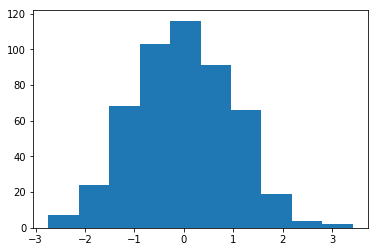

In [29]:
plt.hist(z_group["Age"])

In [30]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [31]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,126.199293,77.708331,30.746230,16674.118425
1,126.900957,59.263176,32.033046,15127.870054
2,112.751606,50.695252,39.354504,17848.222331
3,148.343412,105.206403,45.814082,14398.238828
4,171.922503,79.099480,40.174386,22376.165025
5,170.872049,56.887333,2.634021,15983.410012
6,171.399099,63.752962,11.478075,17597.297133
7,173.700947,80.645650,28.346684,20406.898889
8,172.312372,42.151607,16.198815,22159.122419
9,138.457845,61.620022,28.573884,15202.561891


## Operaciones diversas muy útiles

In [32]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,126.199293,77.708331,30.746230,16674.118425
1,Male,Rich,126.900957,59.263176,32.033046,15127.870054
2,Female,Middle Class,112.751606,50.695252,39.354504,17848.222331
3,Female,Rich,148.343412,105.206403,45.814082,14398.238828
4,Male,Middle Class,171.922503,79.099480,40.174386,22376.165025
7,Male,Poor,173.700947,80.645650,28.346684,20406.898889


In [33]:
double_group.tail(1) #Última fila de cada una de las colecciones

,Gender,Economic Status,Height,Weight,Age,Income
489,Male,Poor,148.610973,58.024936,30.158738,16819.465319
493,Male,Middle Class,189.212316,59.461685,19.120122,16189.108122
495,Female,Poor,141.336496,60.829693,36.048959,24608.766488
496,Male,Rich,196.678515,38.282203,13.695092,15263.231932
498,Female,Middle Class,167.673526,72.388062,44.104359,18878.452154
499,Female,Rich,137.363058,38.588621,11.228907,17413.260098


In [34]:
double_group.nth(32) #Elemento trigesimosegundo de cada una de las filas

Age      Height        Income     Weight
Gender Economic Status                                                
Female Middle Class     27.918735  131.381546  11305.639881  70.242709
       Poor             40.732695  156.994007  15617.490946  26.327425
       Rich             19.787897  123.617248  20466.079788  66.767469
Male   Middle Class     18.672673  201.793010  16336.192418  88.228359
       Poor             19.144576  157.036823  11239.941454  57.932084
       Rich             30.795251  168.770401  20407.528871  94.498719

In [35]:
double_group.nth(82)

,,Age,Height,Income,Weight
Gender,Economic Status,,,,
Female,Poor,39.407821,193.131519,20931.465327,44.020837
Male,Middle Class,19.935041,156.668524,21542.853288,29.716575


In [36]:
data_sorted = data.sort_values(["Age", "Income"])

In [37]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
257,Male,Poor,238.802150,45.305364,0.531461,15068.941763
403,Female,Middle Class,168.245879,84.260904,1.115046,17155.591332
398,Female,Poor,169.355585,74.534785,1.269909,21256.682021
371,Female,Rich,187.645006,41.056408,2.341734,16560.544344
5,Male,Rich,170.872049,56.887333,2.634021,15983.410012
292,Female,Rich,109.585709,63.782445,4.461626,13235.404173
141,Female,Middle Class,189.697108,39.324572,5.475495,22393.698721
429,Male,Middle Class,167.586566,74.969341,5.700936,19643.677764
112,Male,Middle Class,185.013015,82.789441,6.128364,18705.500869
201,Female,Poor,192.303650,71.796425,6.360427,17642.558404


In [38]:
age_grouped = data_sorted.groupby("Gender")
age_grouped.head()

,Gender,Economic Status,Height,Weight,Age,Income
257,Male,Poor,238.802150,45.305364,0.531461,15068.941763
403,Female,Middle Class,168.245879,84.260904,1.115046,17155.591332
398,Female,Poor,169.355585,74.534785,1.269909,21256.682021
371,Female,Rich,187.645006,41.056408,2.341734,16560.544344
5,Male,Rich,170.872049,56.887333,2.634021,15983.410012
292,Female,Rich,109.585709,63.782445,4.461626,13235.404173
141,Female,Middle Class,189.697108,39.324572,5.475495,22393.698721
429,Male,Middle Class,167.586566,74.969341,5.700936,19643.677764
112,Male,Middle Class,185.013015,82.789441,6.128364,18705.500869
242,Male,Rich,166.443147,40.912483,8.799557,20174.840186


In [39]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
477,Male,Middle Class,156.233263,52.269037,61.126465,18665.074169
230,Female,Poor,166.062855,75.294681,67.209385,22736.752909


# Conjunto de entrenamiento y conjunto de test

In [42]:
mainpath = "/Users/diegogarcia-viana/Desktop/Curso machine learning & data scientist/python-ml-course/datasets"
filename = "customer-churn-model/Customer Churn Model.txt"
data = pd.read_csv(os.path.join(mainpath, filename))

In [45]:
len(data)

3333

## Dividir utilizando la distribución normal

In [52]:
a = np.random.randn(len(data))

(array([ 12.,  48., 265., 618., 876., 875., 437., 173.,  26.,   3.]),
 array([-3.46882742, -2.75266224, -2.03649706, -1.32033188, -0.60416669,
         0.11199849,  0.82816367,  1.54432885,  2.26049403,  2.97665921,
         3.69282439]),
 <a list of 10 Patch objects>)

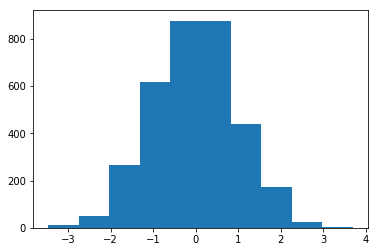

In [53]:
plt.hist(a)

In [61]:
check = (a < 0.75) #75% de los casos para training

In [62]:
check

array([ True,  True, False, ...,  True,  True,  True])

(array([ 720.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2613.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

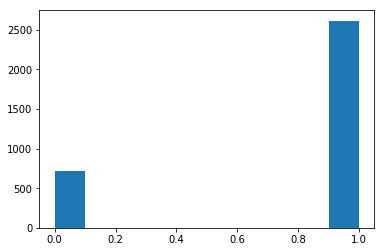

In [67]:
plt.hist(check.astype(int)) #Convertimos el array de valores booleanos a enteros, porque con booleanos no funciona la función hist

In [64]:
training = data[check]
testing = data[~check]

In [65]:
len(training)

2613

In [66]:
len(testing)

720

## Con la librería sklearn (librería de aprendizaje estadístico de python)

In [68]:
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [69]:
train, test = train_test_split(data, test_size = 0.2) #El 20% del dataset será utilizado para funciones de testing

In [72]:
len(train) #80%

2666

In [73]:
len(test) #20%

667

## Usando una función de shuffle (mezclado de datos)